In [368]:
import cv2
import numpy as np
import pandas as pd
from PIL import Image
from matplotlib import pyplot as plt
import pytesseract as pyt
%matplotlib inline

In [2]:
def img_bw_data(imgpath):
    # type: (object) -> object
    img = Image.open(imgpath)
    img_bw = img.convert('L')
    pixels_array = np.where(np.asarray(img_bw) > 255/2, 0, 1)
    return pixels_array

In [143]:
imgpath = '/Users/hechengwang/Files/0a0b3e51-c906-43f6-8041-a497017a845e.png'
datapath = '/Users/hechengwang/Files/listOfFields.csv'

In [350]:
im = cv2.imread(imgpath)
imgray = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imgray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

In [351]:
# %timeit pyt_string = pyt.image_to_string(Image.open(imgpath), boxes=True)
#pyt_string_split = pyt_string.split(' |\n')

In [352]:
cont_hierarchy = np.array(zip(contours, hierarchy[0][:,2]))
# will result in next and previous contours at the same hierarchical level, the first child contour and the parent contour

In [353]:
real_contours = cont_hierarchy[cont_hierarchy[:,1] == -1][:,0]

In [354]:
img = cv2.drawContours(im, real_contours, -1, (0,255,0), 2)

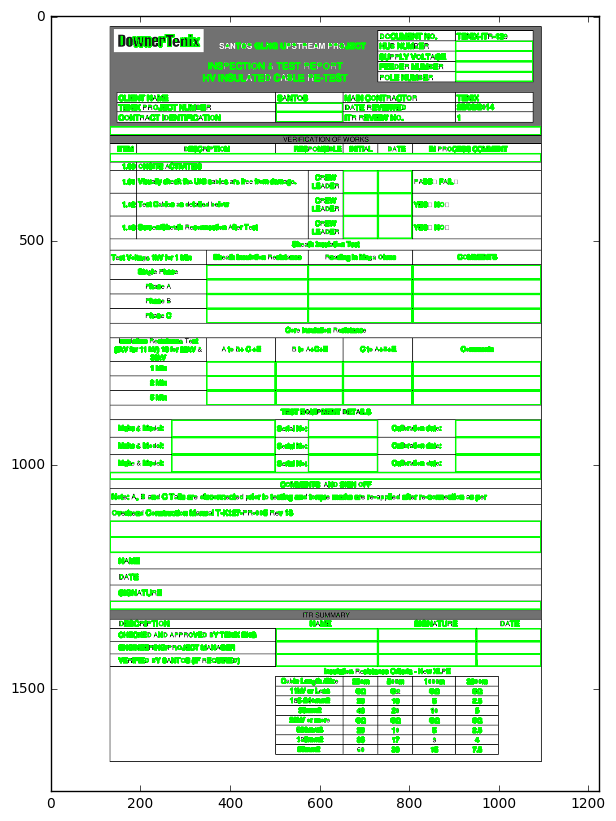

In [355]:
plt.figure(figsize = (20, 10))
plt.imshow(img)

In [150]:
pyt_string = pyt.image_to_string(Image.open(imgpath), boxes=True)
pyt_string_split = pyt_string.split('\n')
pyt_string_split2 = [split.split() for split in pyt_string_split]

In [151]:
print pyt_string_split2[0]
print pyt_string_split2[0][1:3]
print pyt_string_split2[0][2:4]
print pyt_string_split2[0][3:5]

['~', '63', '1543', '1136', '1549', '0']
['63', '1543']
['1543', '1136']
['1136', '1549']


* TODO: figure out what's going on with the boxes in pytesseract
* TODO: remove all character contours using coordinates from pytesseract
* TODO: remove contours that have contours inside them
* TODO: add ":" and "?" logic

In [365]:
class Image_Data:
    def __init__(self, imgpath):
        self.img_pil = Image.open(imgpath)
        self.img_pil_gray = self.img_pil.convert('L')
        self.img = cv2.imread(imgpath)
        
        self.height, self.width, self.channels = self.img.shape
        pyt_string = pyt.image_to_string(self.img_pil_gray, boxes=True)
        pyt_string_split = pyt_string.split('\n')
        # print pyt_string_split
        self.string_split = [split.split() for split in pyt_string_split]
        self.char_array = self.get_char_arrays()
        self.wordless_img = cv2.drawContours(self.img, self.char_array, -1, (255, 255, 255), -1)
        self.wordless_img = cv2.drawContours(self.wordless_img, self.char_array, -1, (255, 255, 255), 2)
        self.imgray = cv2.cvtColor(self.wordless_img, cv2.COLOR_BGR2GRAY)
        
        ret, thresh = cv2.threshold(self.imgray, 127, 255, 0)
        self.image, self.contours, self.hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cont_hierarchy = np.array(zip(self.contours, self.hierarchy[0][:,2]))
        self.real_contours = cont_hierarchy[cont_hierarchy[:,1] == -1][:,0]
        self.final_img = cv2.drawContours(cv2.imread(imgpath), real_contours, -1, (0, 255, 0), 2)
    
    def get_wordless_img(self):
        plt.figure(figsize=(20, 10))
        return plt.imshow(self.wordless_img)
    
    def get_final_img(self):
        plt.figure(figsize=(20, 10))
        return plt.imshow(self.final_img)
        
    def get_img_string(self):
        print pyt.image_to_string(self.img_pil)
        
    def get_char_arrays(self):
        char_list = []
        for char_split in self.string_split:
            char_id = char_split[0]
            if (char_id != '~') & (char_id != '_'):
                char_split_s = self.height - int(char_split[2])
                char_split_w = int(char_split[1])
                char_split_n = self.height - int(char_split[4])
                char_split_e = int(char_split[3])
    
                char_boundaries = np.array([[[char_split_e, char_split_s]],[[char_split_e, char_split_n]],
                                             [[char_split_w, char_split_n]],[[char_split_w, char_split_s]]])
                char_list.append(char_boundaries)
            
        return char_list

In [366]:
imgpath = '/Users/hechengwang/Files/0a2046d1-deb0-4d24-a8f0-a4650186030b.png'
test = Image_Data(imgpath)

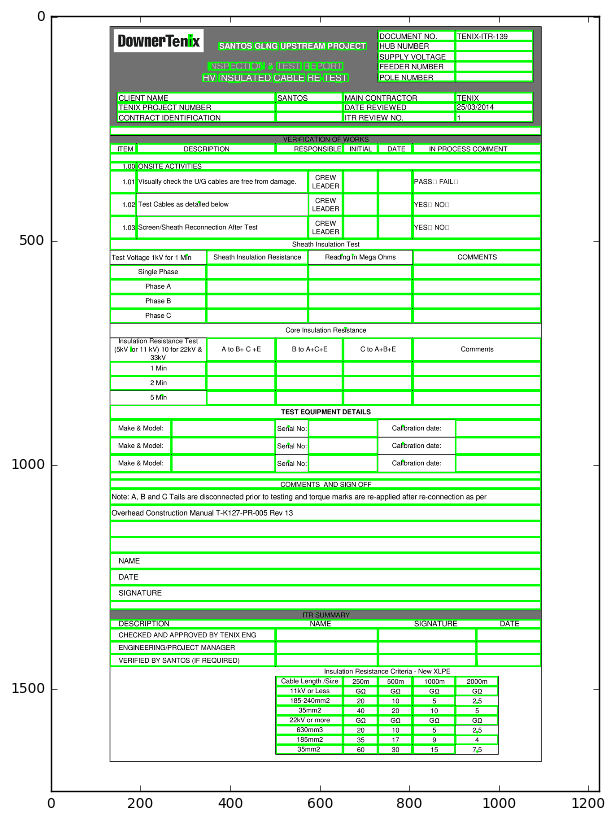

In [367]:
test.get_final_img()